### 1. Data input

In [29]:
import numpy    as np
import pandas   as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates  as mdt

columns = ['regiao','estado','data','casosNovos','casosAcumulados','obitosNovos','obitosAcumulados']
data    =   pd.read_csv('arquivo_geral.csv',sep=';')


### 2. Plots for all Brazil

[-60, 60, 0, 25000]

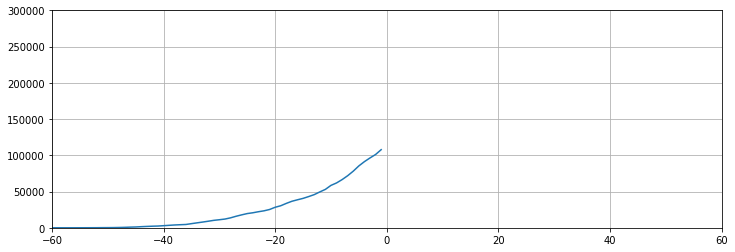

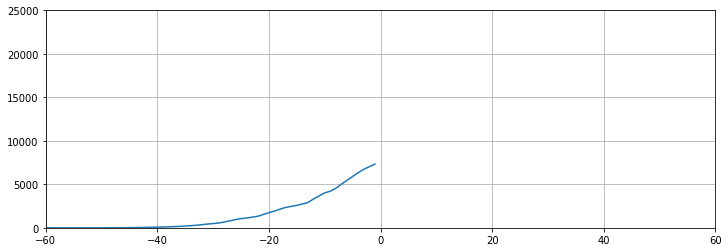

In [126]:
Brasil = data.groupby('data').sum()
date   = pd.to_datetime(Brasil.index)
t      = np.empty(len(date), dtype='int')
now    = datetime.datetime.now().timestamp()

for k, d in enumerate(date):
    t[k] = int((d.timestamp() - now)/86400)

Brasil.set_index(t, inplace=True)    

plt.figure(1, figsize=(12,4))
plt.plot(t, Brasil['casosAcumulados'])  
plt.grid(True)
plt.axis([-60, 60, 0, 300000])

plt.figure(2, figsize=(12,4))
plt.plot(t, Brasil['obitosAcumulados'])  
plt.grid(True)
plt.axis([-60, 60, 0, 25000])


### 3. All Brazil modelling

266220.29338771006
3.1418490603744065


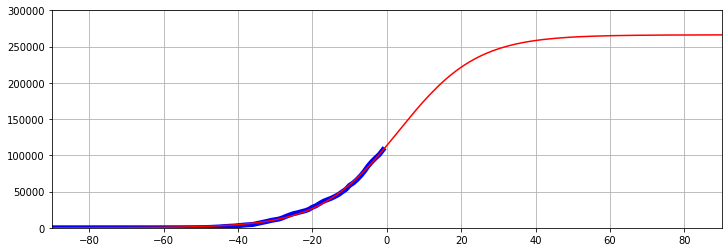

In [125]:
from scipy.optimize import curve_fit

def model(t, p1, p2, p3):
    return p1/(1 + np.exp(-(t - p2)/p3))

#================================================================

X    = Brasil['casosAcumulados'].values

Pmin = (100000, -100, 10)     # lower bounds
P0   = (200000,    0, 30)     # initial guesses
Pmax = (300000,  100, 90)     # upper bounds
            
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-90, 90, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-90, 90, 0, 300000])

print(P[0])
print(P[1])

20590.15966920413
4.438540282871747


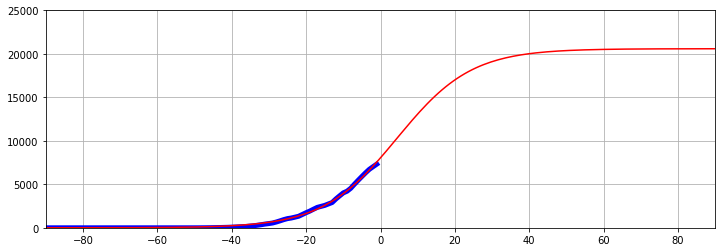

In [124]:
X    = Brasil['obitosAcumulados'].values

Pmin = (10000, -100, 10)     # lower bounds
P0   = (20000,    0, 30)     # initial guesses
Pmax = (30000,  100, 90)     # upper bounds
             
P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(-90, 90, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.grid(True)
plt.axis([-90, 90, 0, 25000])

print(P[0])
print(P[1])

### 4. Plots for some subset

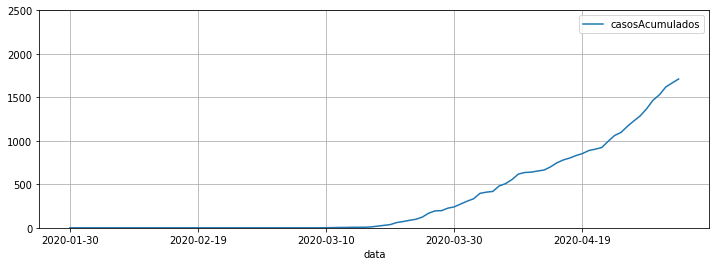

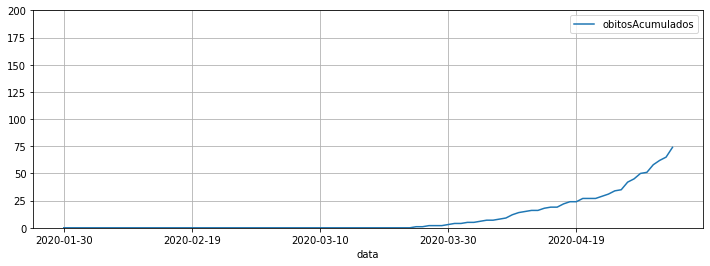

In [8]:
sel = data[data['estado'] == 'RS']
sel.index = sel['data']

f1  = sel.plot(y=['casosAcumulados'],  
               grid=True, figsize=(12,4), ylim=(0, 2500)) #ylim=(1e0, 1e4))
f1  = sel.plot(y=['obitosAcumulados'],  
               grid=True, figsize=(12,4), ylim=(0, 200)) #ylim=(1e0, 1e4))


### 3. Modelling